# Pontificia Universidad Católica del Ecuador
## Facultad de Ingeniería
### Asignatura: Inteligencia de Negocios
**Docente:** Edison Mora

Con el siguiente dataset:

https://www.seracademia.com/academia/Algerian_forest_fires_dataset_UPDATE.csv

Y usando la metodología de ciencia de datos **CRISP-DM** elabore un script en python de regresion lineal simple. 





# Importar librerias

In [1]:
import empiricaldist
import janitor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

import scipy.stats
import sklearn.metrics 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

# Fase 1 


#### Comprension del negocio
* ##### Establecer objetivos del negocio
    1. ###### Incrementar las interacciones con los artículos publicados en un 20% durante el próximo trimestre. 
* ##### Evaluar la situacion actual
    1. ##### Gran volumen de artículos y diversidad en la calidad del contenido. 
    2. ##### Herramientas como Google Search, Cloud AI, y algoritmos de Machine Learning. 
    3. ##### Contenido duplicado, falta de datos en algunos campos como los comentarios, y posible sesgo en los datos. 
* ##### Fijar los objetivos a nivel de mineria de datos
    1. Aumentar la cantidad de veces que se compartirá un artículo, utilizando variables clave del comportamiento de los usuarios. 
* ##### Obtener un plan de proyecto



# Fase 2 


#### Comprension de los datos
* ##### Ejecutar procesos de captura de datos.

In [2]:
df = pd.read_csv('./articulos_ml.csv')

* ##### Proporcionar una descripcion del juego de los datos.

In [3]:
df

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


* ##### Realizar tareas de exploracion de los datos.

In [4]:
df.dtypes

Title              object
url                object
Word count          int64
# of Links          int64
# of comments     float64
# Images video      int64
Elapsed days        int64
# Shares            int64
dtype: object

In [5]:
(
    df
        .describe(include=[np.number])
)

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [6]:
(
    df
        .describe(include=object)
)

,Title,url
count,161,122
unique,161,121
top,What is Machine Learning and how do we use it ...,https://www.analyticsvidhya.com/blog/2017/05/p...
freq,1,2


* ##### Gestionar la calidad de los datos, identificando problemas y proporcionando soluciones.

In [7]:
(
    df
        .isnull()
        .sum()
        .sort_values(ascending=False)
)

url               39
# of comments     32
Title              0
Word count         0
# of Links         0
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64

# Fase 3 


#### Preparacion de los datos
* ##### Establecer el universo de los datos con lo que trabajar.

In [8]:

df_clean = df.copy(deep=True)

df_clean = (
    df_clean
    .impute(column_names="url", statistic_column_name="mode")
    .impute(column_names="# of comments", statistic_column_name="mean")
)

In [9]:
df_clean

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.000000,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,https://www.analyticsvidhya.com/blog/2017/05/p...,1742,9,8.782946,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,https://www.analyticsvidhya.com/blog/2017/05/p...,962,6,0.000000,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,https://www.analyticsvidhya.com/blog/2017/05/p...,1221,3,8.782946,2,68,200000
4,Nasa finds entire solar system filled with eig...,https://www.analyticsvidhya.com/blog/2017/05/p...,2039,1,104.000000,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.000000,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.000000,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.000000,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.000000,3,87,33660


# Fase 4 


#### Modelado
* ##### Seleccionar las tecnicas de modelado mas adecaudas para nuestro juego de de datos y nuestros objetivos.

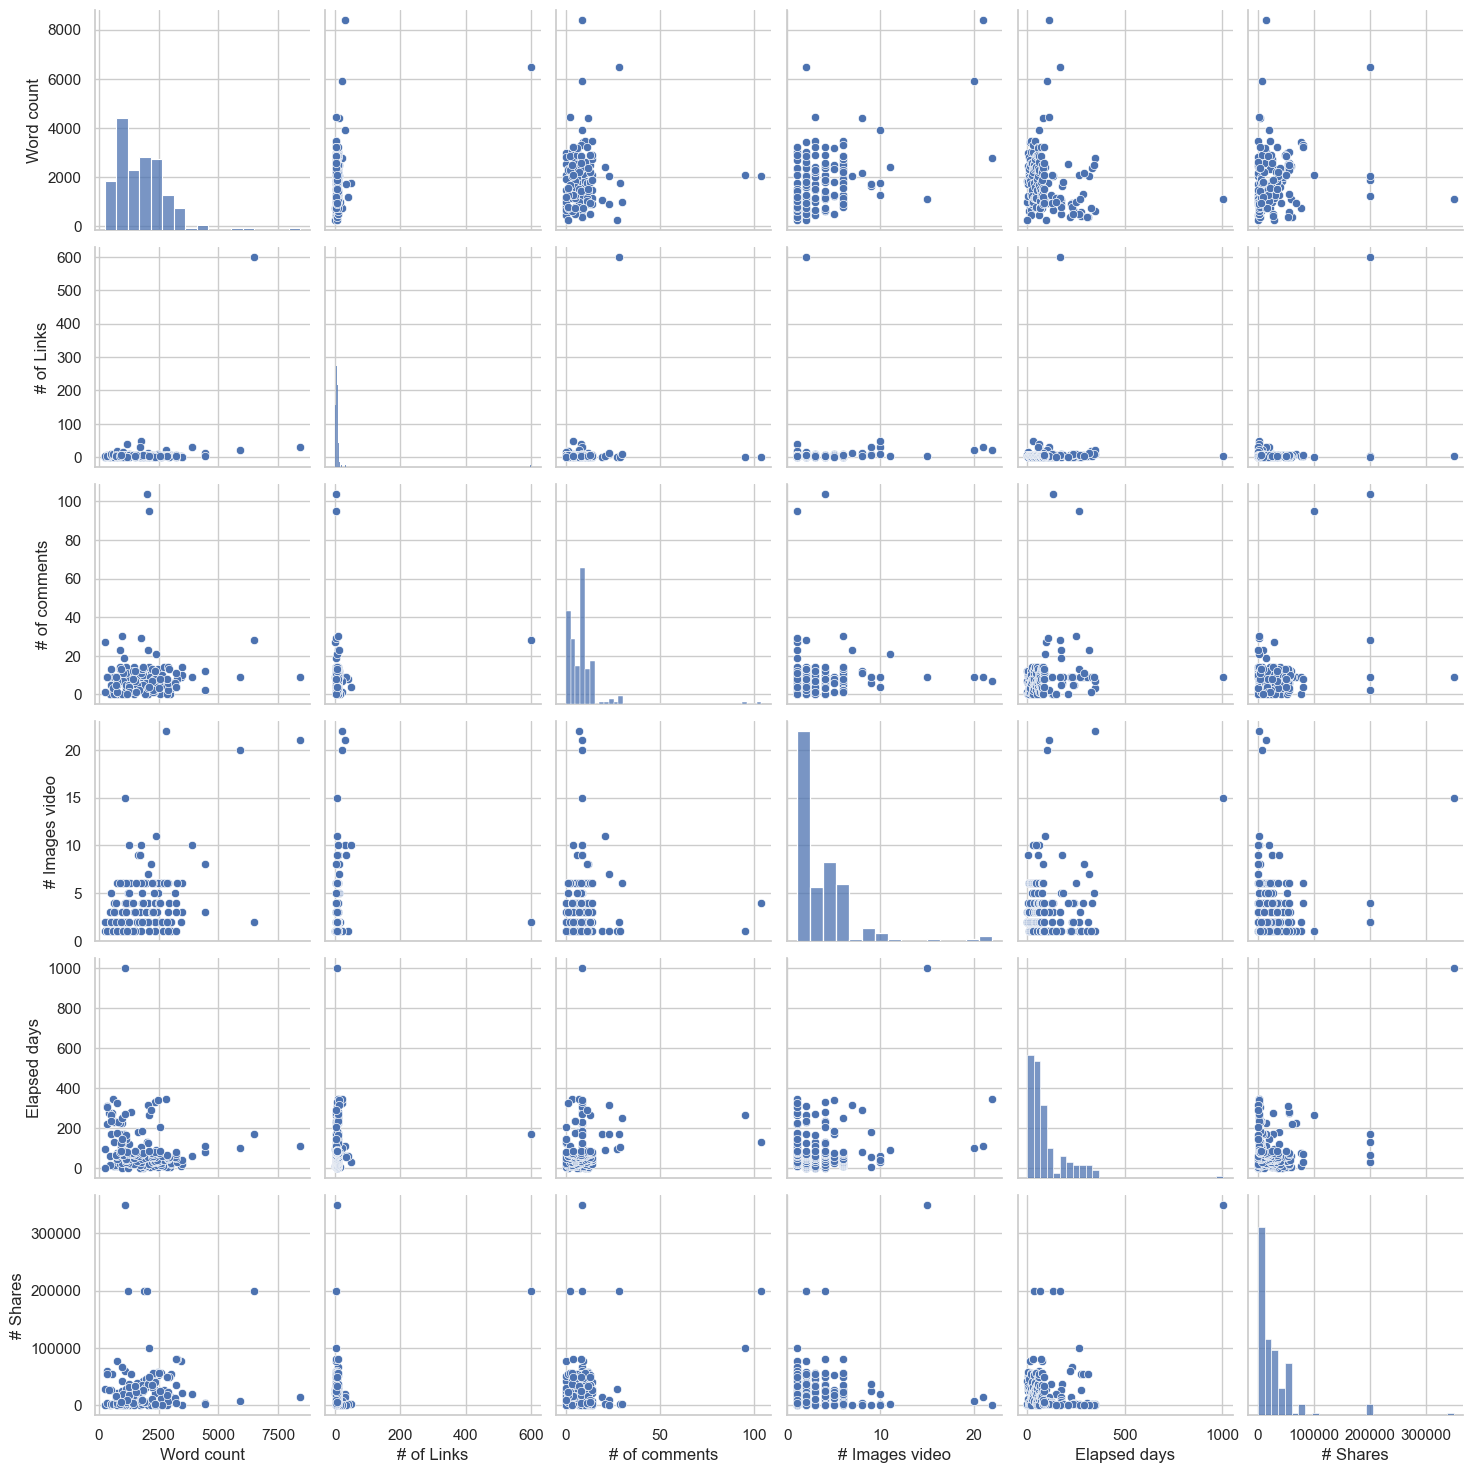

In [10]:
sns.set(style='whitegrid', context='notebook')
cols = ['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days', '# Shares']
sns.pairplot(df_clean[cols], height=2.5)
plt.show()

<Axes: >

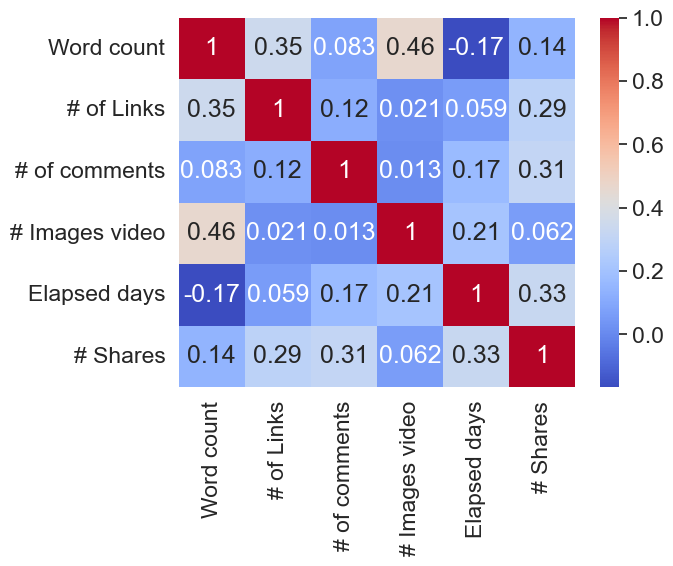

In [11]:
cm = np.corrcoef(df_clean[cols].values.T)# De este arreglo de valores dame la transpuesta es por eso que le ponemos que sea asi.
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols, cmap="coolwarm")


In [12]:
from sklearn.preprocessing import StandardScaler # Hace que el modelo se ajuste mejor a los datos.
from sklearn.linear_model import LinearRegression

X = df_clean['Elapsed days'].values.reshape(-1, 1)
y = df_clean['# Shares'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

* ##### Construir un modelo a parter de la aplicacion de las tecnicas seleccionads sobre el juego de datos.

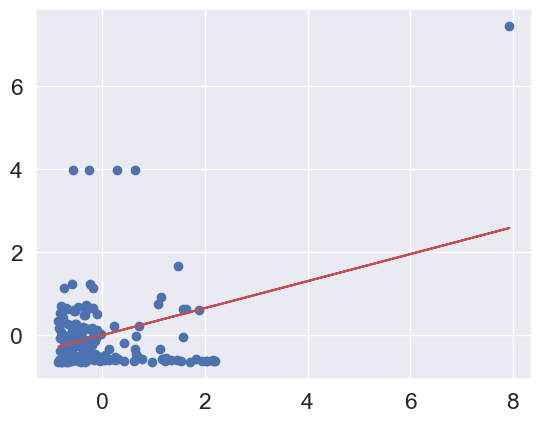

In [13]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='r')

In [14]:
num_days = 10
num_days_std = sc_x.transform(np.array([num_days]).reshape(-1,1))
print(f"El numero de veces compartidas del articulo con  ${num_days} dias es de ", sc_y.inverse_transform(slr.predict(num_days_std)))

El numero de veces compartidas del articulo con  $10 dias es de  [[17063.62702901]]


In [15]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE

    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.3, random_state = 42)

In [28]:
y_pred = slr.predict(X_test)

In [29]:
ndf = [Reg_Models_Evaluation_Metrics(slr,X_train,y_train,X_test,y_test,y_pred)]

lm_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score2.insert(0, 'Model', 'Linear Regression')
lm_score2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,-0.488659,-0.520333,-0.952915,0.58304
